In [5]:
from lnn import Predicate, Variable, Exists, Implies, ForAll, Model, Fact, World

model = Model()

# Variable
x = Variable("x")

# Predicate declarations
square = Predicate(name="square")
rectangle = Predicate(name="rectangle")
foursides = Predicate(name="foursides")

# Axioms declarations
square_rect = ForAll(
    x,
    Implies(square(x), rectangle(x), name="square-rect"),
    name="all-square-rect",
    world=World.AXIOM,
)
rect_foursides = ForAll(
    x,
    Implies(rectangle(x), foursides(x), name="rect-foursides"),
    name="all-rect-foursides",
    world=World.AXIOM,
)

# Query
query = Exists(x, foursides(x), name="foursided_objects")

# Add predicates and rules to the model
model.add_formulae(square, rectangle, square_rect, rect_foursides, query)

# Add facts to the model
model.add_facts({"square": {"c": Fact.TRUE, "k": Fact.TRUE}})

# Perform inference
steps, facts_inferred = model.infer()

# Inspect the query node
model["foursided_objects"].true_groundings


{'c', 'k'}

In [6]:
model.print()


***************************************************************************
                                LNN Model

OPEN   Exists: foursided_objects (x)                        TRUE (1.0, 1.0)

AXIOM  ForAll: all-rect-foursides (x)                       TRUE (1.0, 1.0)

OPEN   Implies: rect-foursides(x) 
'c'                                                         TRUE (1.0, 1.0)
'k'                                                         TRUE (1.0, 1.0)

OPEN   Predicate: foursides(x0) 
'c'                                                         TRUE (1.0, 1.0)
'k'                                                         TRUE (1.0, 1.0)

AXIOM  ForAll: all-square-rect (x)                          TRUE (1.0, 1.0)

OPEN   Implies: square-rect(x) 
'c'                                                         TRUE (1.0, 1.0)
'k'                                                         TRUE (1.0, 1.0)

OPEN   Predicate: rectangle(x0) 
'c'                                                      

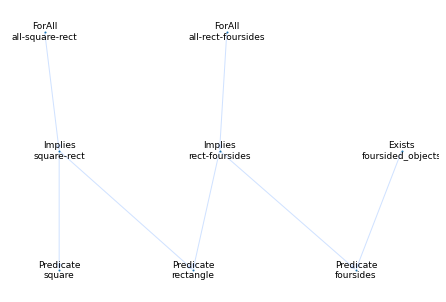

In [7]:
from lnn.utils import plot_graph

plot_graph(model)